In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread("./videos/video_1/frame_01330.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

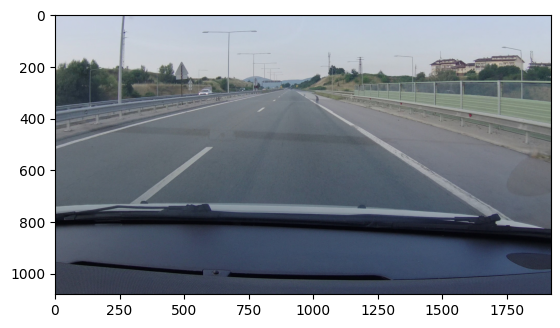

In [3]:
plt.imshow(image_rgb)

[309, 312, 317, 321, 330, 336, 360, 376, 516, 750]
[70. 70. 70. ...  0.  0.  0.]


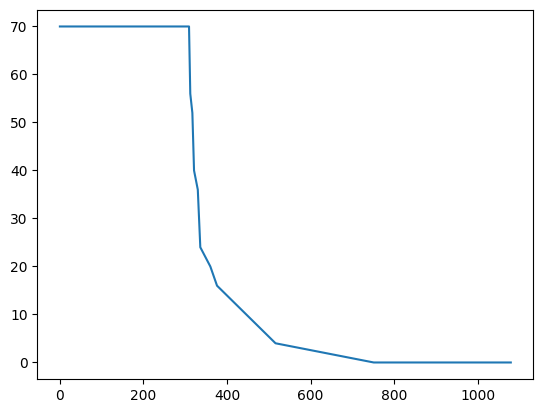

In [4]:
x = np.arange(1080)
heights = [750,516,376,360,336,330,321,317,312,309]
distances = [0,4,16,20,24,36,40,52,56,70]
heights.reverse()
distances.reverse()
print(heights)

interp = np.interp(x, heights, distances)
print(interp)
plt.plot(x, interp)

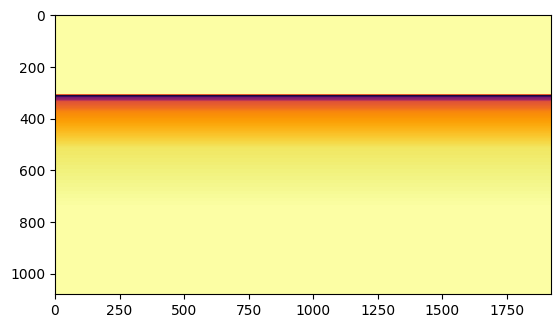

In [5]:
depth = np.zeros((1080, 1920), dtype=np.float32)

# depth[:,:] = 255

for h in range(311, 751):
    # print(h, interp[h], interp[h] * 4.0)
    depth[h,:] = interp[h] * 4.0

cv2.imwrite("depth.png", depth.astype(np.uint8))

plt.imshow(depth, cmap=plt.get_cmap('inferno_r'))

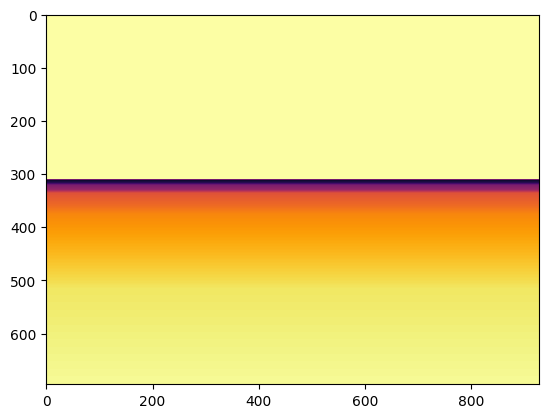

In [6]:
depth_target_rectangle = depth[0:696, (1920 - 928) // 2 : (1920 + 928) // 2]

plt.imshow(depth_target_rectangle, cmap=plt.get_cmap('inferno_r'))

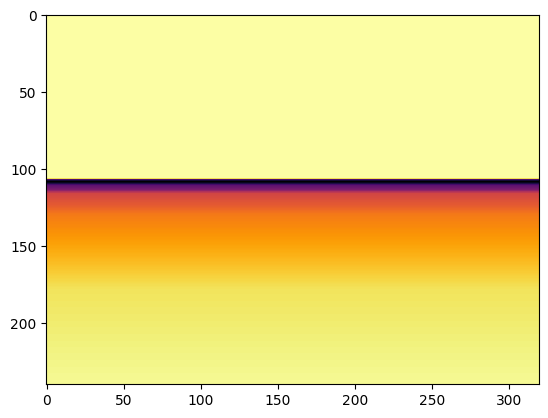

In [7]:
depth_unet = cv2.resize(depth_target_rectangle, (320, 240), interpolation = cv2.INTER_AREA)

plt.imshow(depth_unet, cmap=plt.get_cmap('inferno_r'))

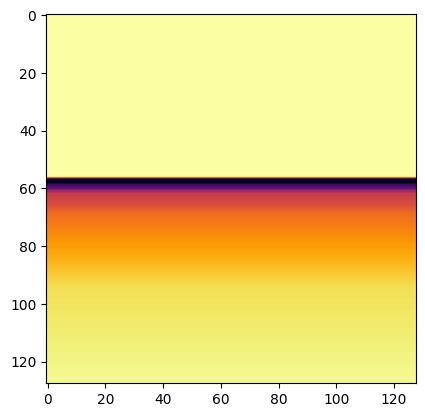

In [8]:
depth_resnet = cv2.resize(depth_target_rectangle, (170, 128), interpolation = cv2.INTER_AREA)
depth_resnet = depth_resnet[:, 0:128]
plt.imshow(depth_resnet, cmap=plt.get_cmap('inferno_r'))